In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import os 

sns.set()

# https://www.kaggle.com/yasserh/song-popularity-prediction-best-ml-models

In [316]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    
    main_path = "/content/drive/MyDrive/DataScience/TrafficSignsRecognition"
else:
    main_path = os.getcwd().split("/code")[0]

In [317]:
df = pd.read_csv(f"{main_path}/dataset/song_data.csv")

In [318]:
df.head()

song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294  167.060               4          0.474  
1    -6.407           0       0.0498  105.256               4          0.370  
2    -7.828           1       0.0792  123.881               4          0.324  
3    -4.938           1       0.1070  122.444               4          0.198  
4    -5.065           1       0.0313  172.011               4          0.574

In [153]:
df.describe()

song_popularity  song_duration_ms  acousticness  danceability  \
count     18835.000000      1.883500e+04  18835.000000  18835.000000   
mean         52.991877      2.182116e+05      0.258539      0.633348   
std          21.905654      5.988754e+04      0.288719      0.156723   
min           0.000000      1.200000e+04      0.000001      0.000000   
25%          40.000000      1.843395e+05      0.024100      0.533000   
50%          56.000000      2.113060e+05      0.132000      0.645000   
75%          69.000000      2.428440e+05      0.424000      0.748000   
max         100.000000      1.799346e+06      0.996000      0.987000   

             energy  instrumentalness           key      liveness  \
count  18835.000000      18835.000000  18835.000000  18835.000000   
mean       0.644995          0.078008      5.289196      0.179650   
std        0.214101          0.221591      3.614595      0.143984   
min        0.001070          0.000000      0.000000      0.010900   
25%        0.510000          0.000000      2.000000      0.092900   
50%        0.674000          0.000011      5.000000      0.122000   
75%        0.815000          0.002570      8.000000      0.221000   
max        0.999000          0.997000     11.000000      0.986000   

           loudness    audio_mode   speechiness         tempo  time_signature  \
count  18835.000000  18835.000000  18835.000000  18835.000000    18835.000000   
mean      -7.447435      0.628139      0.102099    121.073154        3.959119   
std        3.827831      0.483314      0.104378     28.714456        0.298533   
min      -38.768000      0.000000      0.000000      0.000000        0.000000   
25%       -9.044000      0.000000      0.037800     98.368000        4.000000   
50%       -6.555000      1.000000      0.055500    120.013000        4.000000   
75%       -4.908000      1.000000      0.119000    139.931000        4.000000   
max        1.585000      1.000000      0.941000    242.318000        5.000000   

       audio_valence  
count   18835.000000  
mean        0.527967  
std         0.244632  
min         0.000000  
25%         0.335000  
50%         0.527000  
75%         0.725000  
max         0.984000

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


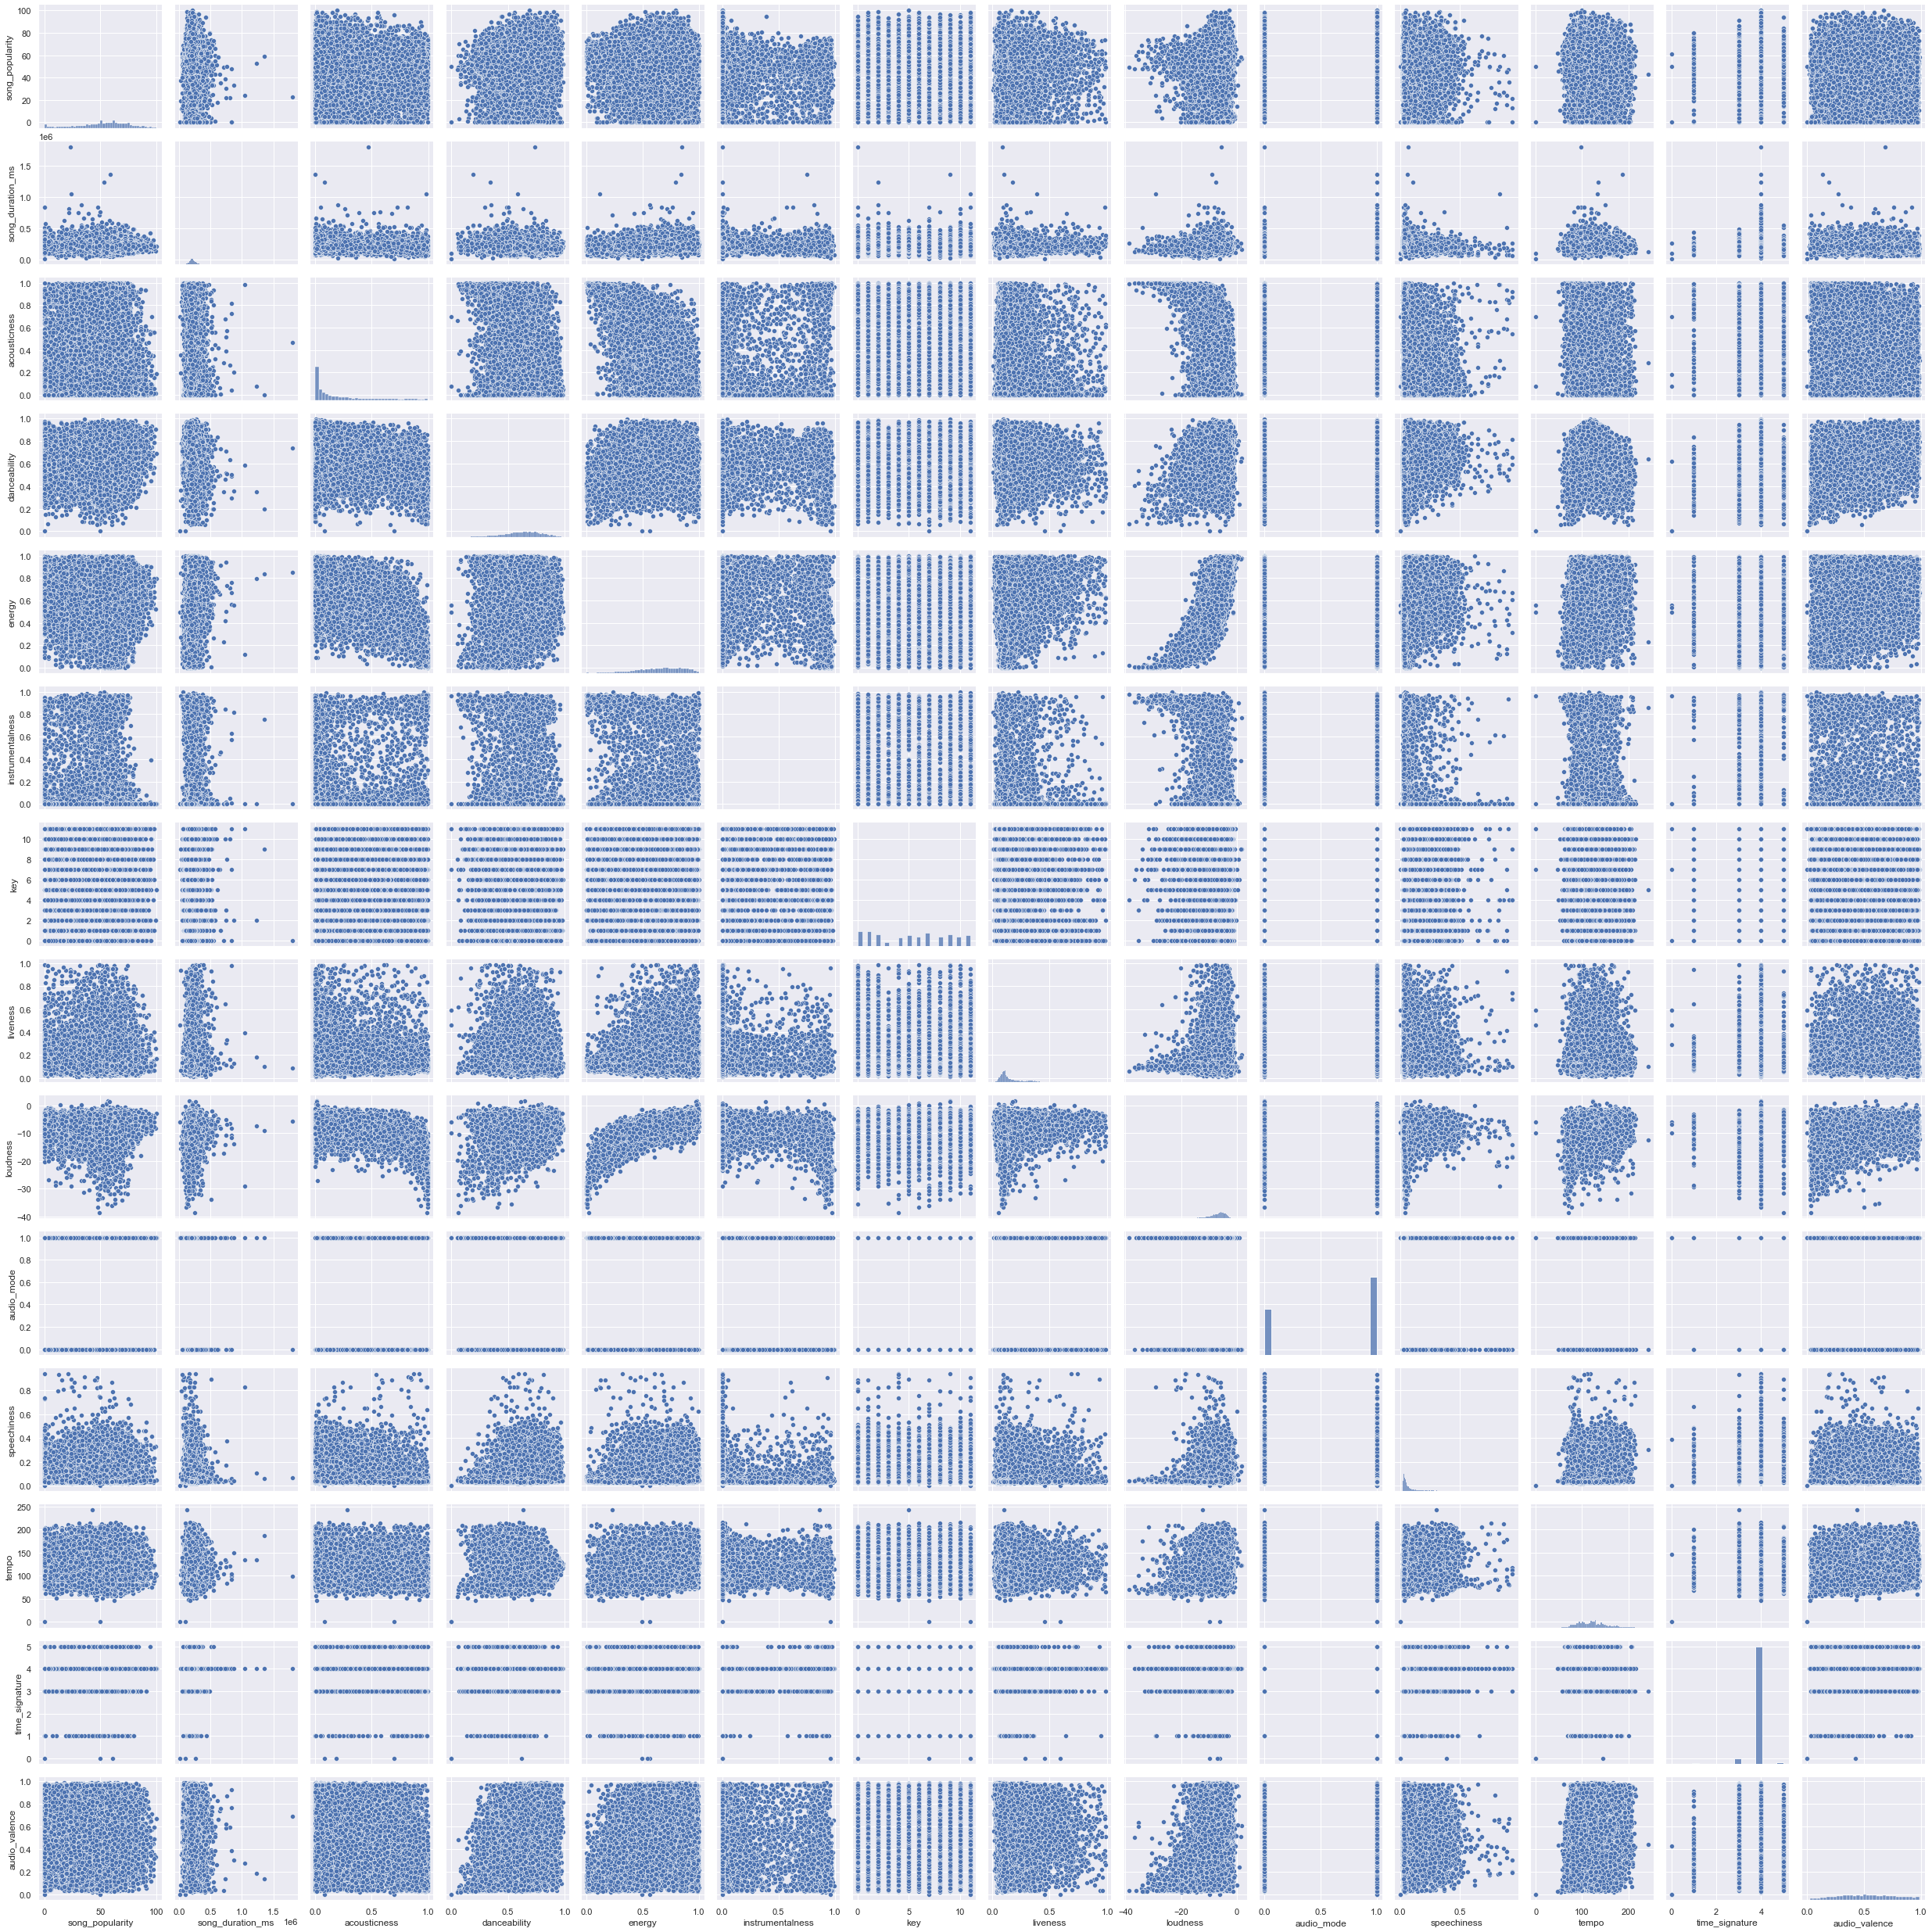

In [8]:
sns.pairplot(data=df)

In [9]:
df.nunique().sort_values()

audio_mode              2
time_signature          5
key                    12
song_popularity       101
danceability          849
energy               1132
speechiness          1224
audio_valence        1246
liveness             1425
acousticness         3209
instrumentalness     3925
loudness             8416
song_duration_ms    11771
tempo               12112
song_name           13070
dtype: int64

In [319]:
song_names = df["song_name"]
df = df.drop("song_name", axis=1)

category_values = ["audio_mode", "time_signature", "key"]
target = "song_popularity"
numerical_values = [col for col in df.columns if col not in category_values and col != target]


<Figure size 864x576 with 0 Axes>

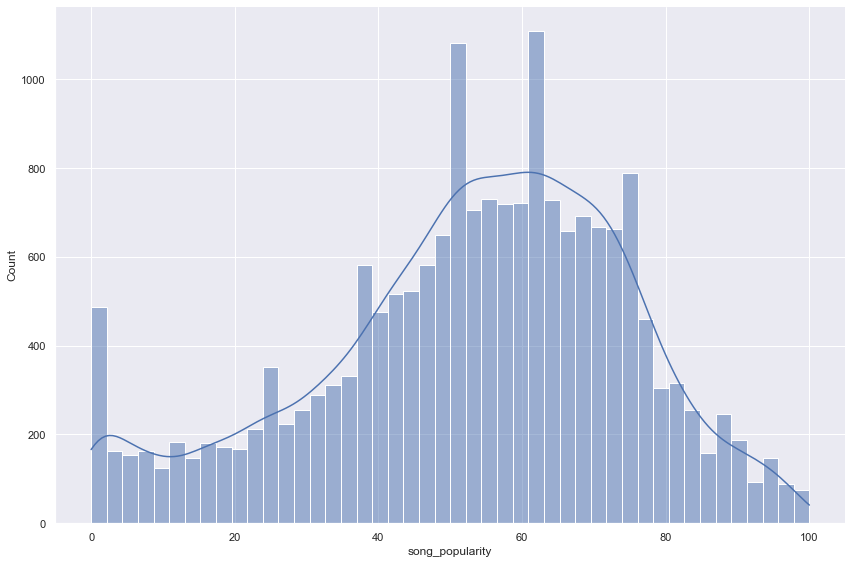

In [320]:
fig_witdth = 12
fig_height = 8
plt.figure(figsize=(fig_witdth,fig_height))
sns.displot(data=df, x=target, color="b", kde=True, height=fig_height, aspect=1.5)

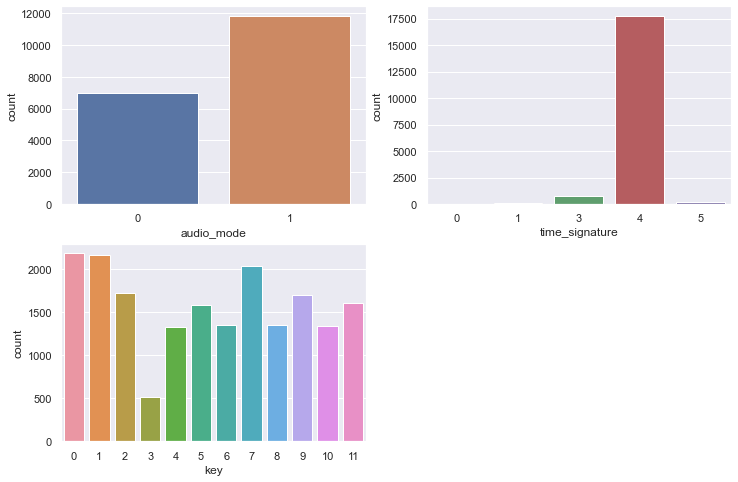

In [292]:
# CATEGORICAL VALUES
n = len(category_values)
n_col = 2

n_rows = n // n_col
n_rest = n % n_col

fig = plt.figure(figsize=(fig_witdth, fig_height))
for i in range(n):
    plt.subplot(n_rows+n_rest, n_col, i+1)
    sns.countplot(data=df, x=category_values[i])
    

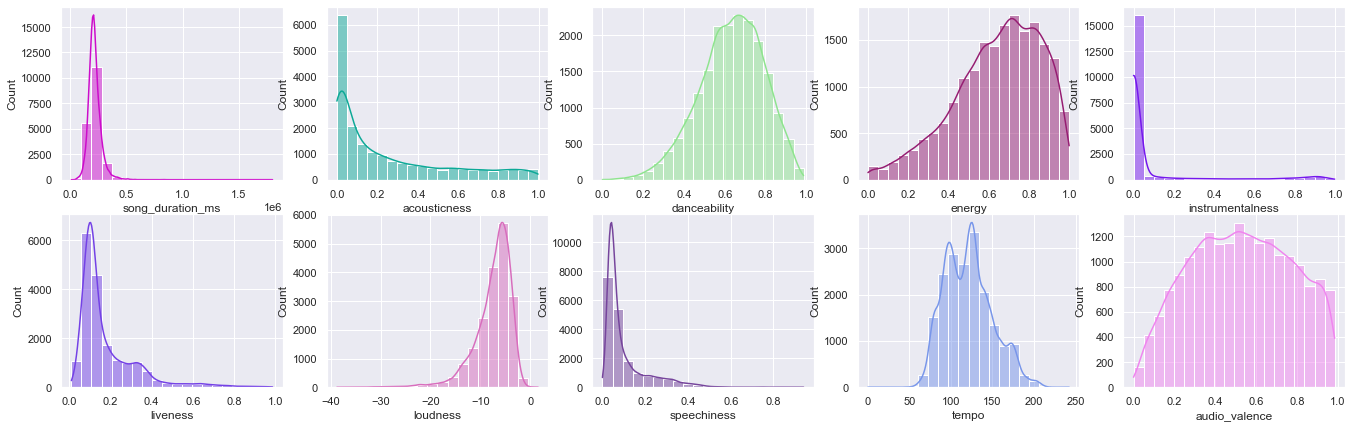

In [13]:
# NUMERIC VALUES
n = len(numerical_values)

n_col = 5

n_rows = n // n_col
n_rest = n % n_col


fig, axes = plt.subplots(n_rows+n_rest, n_col, figsize=(fig_height+15, fig_witdth-5))
axes = axes.ravel()

for col, ax in zip(numerical_values, axes):
    sns.histplot(data=df[col], kde=True, ax=ax, bins=20, color=list(np.random.randint([255,255,255])/255))
    

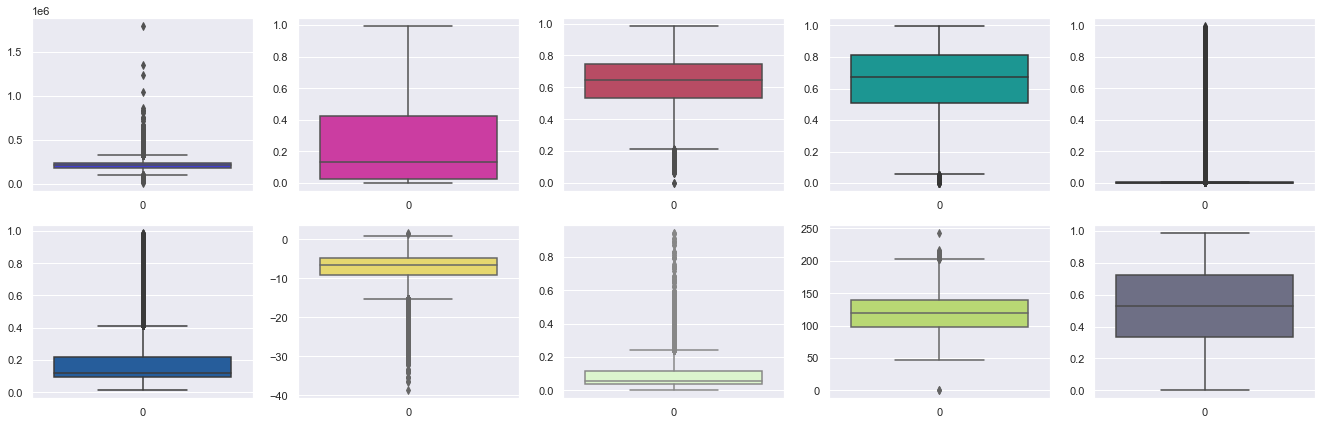

In [119]:
# NUMERIC VALUES
n = len(numerical_values)

n_col = 5

n_rows = n // n_col
n_rest = n % n_col


fig, axes = plt.subplots(n_rows+n_rest, n_col, figsize=(fig_height+15, fig_witdth-5))
axes = axes.ravel()

for col, ax in zip(numerical_values, axes):
    sns.boxplot(data=df[col], ax=ax, color=list(np.random.randint([255,255,255])/255))

Text(0.5, 1.0, 'Duplicated Value Counts')

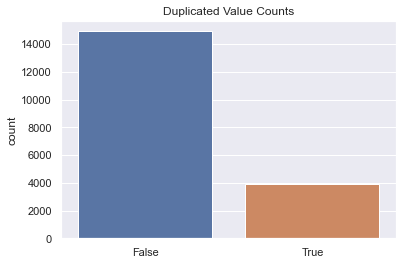

In [321]:
# SHOW THE NUMBER OF DUPLICATED ROWS
sns.countplot(x=df.duplicated())
plt.title("Duplicated Value Counts")

In [322]:
df_clean = df.drop_duplicates()
print([df.shape[0] -df_clean.shape[0]])

[3911]


In [294]:
df

song_popularity  song_duration_ms  acousticness  danceability  energy  \
0                   73            262333      0.005520         0.496   0.682   
1                   66            216933      0.010300         0.542   0.853   
2                   76            231733      0.008170         0.737   0.463   
3                   74            216933      0.026400         0.451   0.970   
4                   56            223826      0.000954         0.447   0.766   
...                ...               ...           ...           ...     ...   
18830               60            159645      0.893000         0.500   0.151   
18831               60            205666      0.765000         0.495   0.161   
18832               23            182211      0.847000         0.719   0.325   
18833               55            352280      0.945000         0.488   0.326   
18834               60            193533      0.911000         0.640   0.381   

       instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
0              0.000029    8    0.0589    -4.095           1       0.0294   
1              0.000000    3    0.1080    -6.407           0       0.0498   
2              0.447000    0    0.2550    -7.828           1       0.0792   
3              0.003550    0    0.1020    -4.938           1       0.1070   
4              0.000000   10    0.1130    -5.065           1       0.0313   
...                 ...  ...       ...       ...         ...          ...   
18830          0.000065   11    0.1110   -16.107           1       0.0348   
18831          0.000001   11    0.1050   -14.078           0       0.0301   
18832          0.000000    0    0.1250   -12.222           1       0.0355   
18833          0.015700    3    0.1190   -12.020           1       0.0328   
18834          0.000254    4    0.1040   -11.790           1       0.0302   

         tempo  time_signature  audio_valence  
0      167.060               4          0.474  
1      105.256               4          0.370  
2      123.881               4          0.324  
3      122.444               4          0.198  
4      172.011               4          0.574  
...        ...             ...            ...  
18830  113.969               4          0.300  
18831   94.286               4          0.265  
18832  130.534               4          0.286  
18833  106.063               4          0.323  
18834   91.490               4          0.581  

[18835 rows x 14 columns]

In [323]:
df_clean_cpy = df_clean.copy()

In [324]:
#One-Hot Binay Encoding
oh=True
dm=True
for cat in category_values:
    if df_clean_cpy[cat].nunique()==2:
        if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(cat);oh = False            
        # ONE HOT ENCODE audio_mode
        df_clean_cpy[cat] = pd.get_dummies(df_clean_cpy[cat],  drop_first=True, prefix=str(cat))
        
    if (df_clean_cpy[cat].nunique() > 2 and df_clean_cpy[cat].nunique() < 17):
        # # ONE HOT ENCODE time_signature
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(cat);dm=False
        df_clean_cpy = pd.concat([df_clean_cpy.drop([cat], axis=1), pd.DataFrame(pd.get_dummies(df_clean_cpy[cat], drop_first=True, prefix=str(cat)))], axis=1)


One-Hot Encoding on features:
audio_mode

Dummy Encoding on features:
time_signature
key


In [325]:
df_clean_cpy.shape

(14924, 27)

In [232]:
n = ['danceability','energy','speechiness','audio_valence','liveness', 'acousticness','instrumentalness','loudness','song_duration_ms','tempo']

In [234]:
n

['danceability',
 'energy',
 'speechiness',
 'audio_valence',
 'liveness',
 'acousticness',
 'instrumentalness',
 'loudness',
 'song_duration_ms',
 'tempo']

In [235]:
numerical_values

['song_duration_ms',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'audio_valence']

In [298]:
np.sort(numerical_values)

array(['acousticness', 'audio_valence', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'song_duration_ms',
       'speechiness', 'tempo'], dtype='<U16')

In [332]:
df_quantile = df_clean_cpy.copy()
for i in np.sort(numerical_values):
#     q1, q3 = np.quantile(df_quantile[col], q=[0.25, 0.75])
#     iqr = q3 - q1
#     r1 = q1 - (1.5 * iqr)
#     r2 = q3 + (1.5 * iqr)

    
#     df_quantile = df_quantile[df_quantile[col] >= r1]
#     df_quantile = df_quantile[df_quantile[col] <= r2]  
#     df_quantile = df_quantile.reset_index(drop=True)
    Q1 = df_quantile[i].quantile(0.25)
    Q3 = df_quantile[i].quantile(0.75)
    IQR = Q3 - Q1
    df_quantile = df_quantile[df_quantile[i] <= (Q3+(1.5*IQR))]
    df_quantile = df_quantile[df_quantile[i] >= (Q1-(1.5*IQR))]
    df_quantile = df_quantile.reset_index(drop=True)


print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df_clean_cpy.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df_quantile.shape[0]))
df_quantile.shape


Inference:
Before removal of outliers, The dataset had 14924 samples.
After removal of outliers, The dataset now has 9049 samples.


(9049, 27)

In [326]:
p1 = 0.025
p2 = 0.975

df_percent = df_clean_cpy.copy()
for col in numerical_values:
    q1, q2 = np.quantile(df[col], q=[p1, p2])
    
    print(f"{col} - q1: {q1} - q2: {q2}\n")
    
    df_percent = df_percent[df_percent[col] >= q1]
    df_percent = df_percent[df_percent[col] <= q2]  
    df_percent = df_percent.reset_index(drop=True)
    
print(f"Size before: {df.shape[0]}")
print(f"Size after: {df_percent.shape[0]} , {df_percent.shape[0]/df.shape[0]*100:.2f}%")    

song_duration_ms - q1: 125497.55 - q2: 351400.0

acousticness - q1: 0.000172 - q2: 0.94

danceability - q1: 0.298 - q2: 0.905

energy - q1: 0.15485000000000002 - q2: 0.963

instrumentalness - q1: 0.0 - q2: 0.895

liveness - q1: 0.0476 - q2: 0.626

loudness - q1: -17.075200000000002 - q2: -2.689700000000004

speechiness - q1: 0.0274 - q2: 0.395

tempo - q1: 75.0887 - q2: 180.88839999999993

audio_valence - q1: 0.08527 - q2: 0.96

Size before: 18835
Size after: 9816 , 52.12%


In [333]:
# DATA MANIPULATION
# TRAIN TEST SPLIT
X = df_quantile.drop("song_popularity", axis=1)
Y = df_quantile["song_popularity"]

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y,train_size=0.8, test_size=0.2, random_state=100)
X_Train.reset_index(drop=True,inplace=True)
print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',X_Train.shape,Y_Train.shape,'\nTesting set   ---> ', X_Test.shape,'', Y_Test.shape)

Original set  --->  (9049, 26) (9049,) 
Training set  --->  (7239, 26) (7239,) 
Testing set   --->  (1810, 26)  (1810,)


In [334]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
X_Train_scale = std.fit_transform(X_Train)
X_Train_scale = pd.DataFrame(X_Train_scale, columns=X.columns)
display(X_Train.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
X_Test_scale = std.transform(X_Test)
X_Test_scale = pd.DataFrame(X_Test_scale, columns=X.columns)
display(X_Test_scale.describe())

                                         Standardardization on Training set                                         


song_duration_ms  acousticness  danceability       energy  \
count       7239.000000   7239.000000   7239.000000  7239.000000   
mean      213189.905650      0.249139      0.632475     0.661822   
std        40327.732564      0.270051      0.146100     0.195234   
min       104528.000000      0.000003      0.202000     0.042700   
25%       186073.500000      0.026300      0.538000     0.531000   
50%       210866.000000      0.137000      0.641000     0.685000   
75%       237856.500000      0.412000      0.739000     0.819000   
max       322346.000000      0.984000      0.981000     0.996000   

       instrumentalness     liveness     loudness   audio_mode  speechiness  \
count       7239.000000  7239.000000  7239.000000  7239.000000  7239.000000   
mean           0.000566     0.153491    -6.797111     0.644426     0.073021   
std            0.001606     0.092022     2.725131     0.478720     0.053679   
min            0.000000     0.011900   -14.375000     0.000000     0.022400   
25%            0.000000     0.090100    -8.403500     0.000000     0.036000   
50%            0.000003     0.118000    -6.281000     1.000000     0.050700   
75%            0.000140     0.195000    -4.791500     1.000000     0.088800   
max            0.010600     0.435000    -0.398000     1.000000     0.253000   

             tempo  ...        key_2        key_3        key_4        key_5  \
count  7239.000000  ...  7239.000000  7239.000000  7239.000000  7239.000000   
mean    120.321018  ...     0.092554     0.027076     0.070314     0.087996   
std      27.154712  ...     0.289827     0.162315     0.255692     0.283308   
min      57.304000  ...     0.000000     0.000000     0.000000     0.000000   
25%      99.604500  ...     0.000000     0.000000     0.000000     0.000000   
50%     119.945000  ...     0.000000     0.000000     0.000000     0.000000   
75%     137.763000  ...     0.000000     0.000000     0.000000     0.000000   
max     195.491000  ...     1.000000     1.000000     1.000000     1.000000   

             key_6        key_7        key_8        key_9       key_10  \
count  7239.000000  7239.000000  7239.000000  7239.000000  7239.000000   
mean      0.070037     0.112446     0.076392     0.098080     0.066031   
std       0.255227     0.315937     0.265642     0.297443     0.248354   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            key_11  
count  7239.000000  
mean      0.081365  
std       0.273413  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 26 columns]


                                          Standardardization on Testing set                                          


song_duration_ms  acousticness  danceability       energy  \
count       1810.000000   1810.000000   1810.000000  1810.000000   
mean           0.020974     -0.019200      0.037750     0.004846   
std            1.012986      0.995288      1.012554     0.988058   
min           -2.629387     -0.922613     -2.898733    -3.131951   
25%           -0.652702     -0.814308     -0.631289    -0.709821   
50%           -0.049186     -0.422688      0.102850     0.162269   
75%            0.614014      0.551270      0.783939     0.779519   
max            2.680799      2.725085      2.344626     1.696429   

       instrumentalness     liveness     loudness   audio_mode  speechiness  \
count       1810.000000  1810.000000  1810.000000  1810.000000  1810.000000   
mean          -0.001480     0.031315     0.043565    -0.000474     0.008024   
std            1.006254     1.020609     0.975042     1.000419     0.995354   
min           -0.352582    -1.465954    -2.764788    -1.346237    -0.933773   
25%           -0.352582    -0.672612    -0.530521    -1.346237    -0.676673   
50%           -0.351000    -0.374837     0.228669     0.742811    -0.390695   
75%           -0.287802     0.538050     0.754919     0.742811     0.273015   
max            6.249936     3.059356     2.400091     0.742811     3.334464   

             tempo  ...        key_2        key_3        key_4        key_5  \
count  1810.000000  ...  1810.000000  1810.000000  1810.000000  1810.000000   
mean     -0.000334  ...    -0.002904     0.020401     0.016709    -0.021983   
std       0.992324  ...     0.996180     1.057872     1.027846     0.967518   
min      -2.509499  ...    -0.319365    -0.166820    -0.275012    -0.310622   
25%      -0.749665  ...    -0.319365    -0.166820    -0.275012    -0.310622   
50%      -0.019133  ...    -0.319365    -0.166820    -0.275012    -0.310622   
75%       0.614567  ...    -0.319365    -0.166820    -0.275012    -0.310622   
max       2.760632  ...     3.131210     5.994470     3.636207     3.219349   

             key_6        key_7        key_8        key_9       key_10  \
count  1810.000000  1810.000000  1810.000000  1810.000000  1810.000000   
mean     -0.003826     0.007821    -0.023439    -0.013977    -0.014498   
std       0.993800     1.009797     0.961874     0.981101     0.974498   
min      -0.274430    -0.355939    -0.287594    -0.329766    -0.265894   
25%      -0.274430    -0.355939    -0.287594    -0.329766    -0.265894   
50%      -0.274430    -0.355939    -0.287594    -0.329766    -0.265894   
75%      -0.274430    -0.355939    -0.287594    -0.329766    -0.265894   
max       3.643914     2.809470     3.477128     3.032454     3.760898   

            key_11  
count  1810.000000  
mean     -0.002567  
std       0.996333  
min      -0.297610  
25%      -0.297610  
50%      -0.297610  
75%      -0.297610  
max       3.360108  

[8 rows x 26 columns]

<AxesSubplot:>

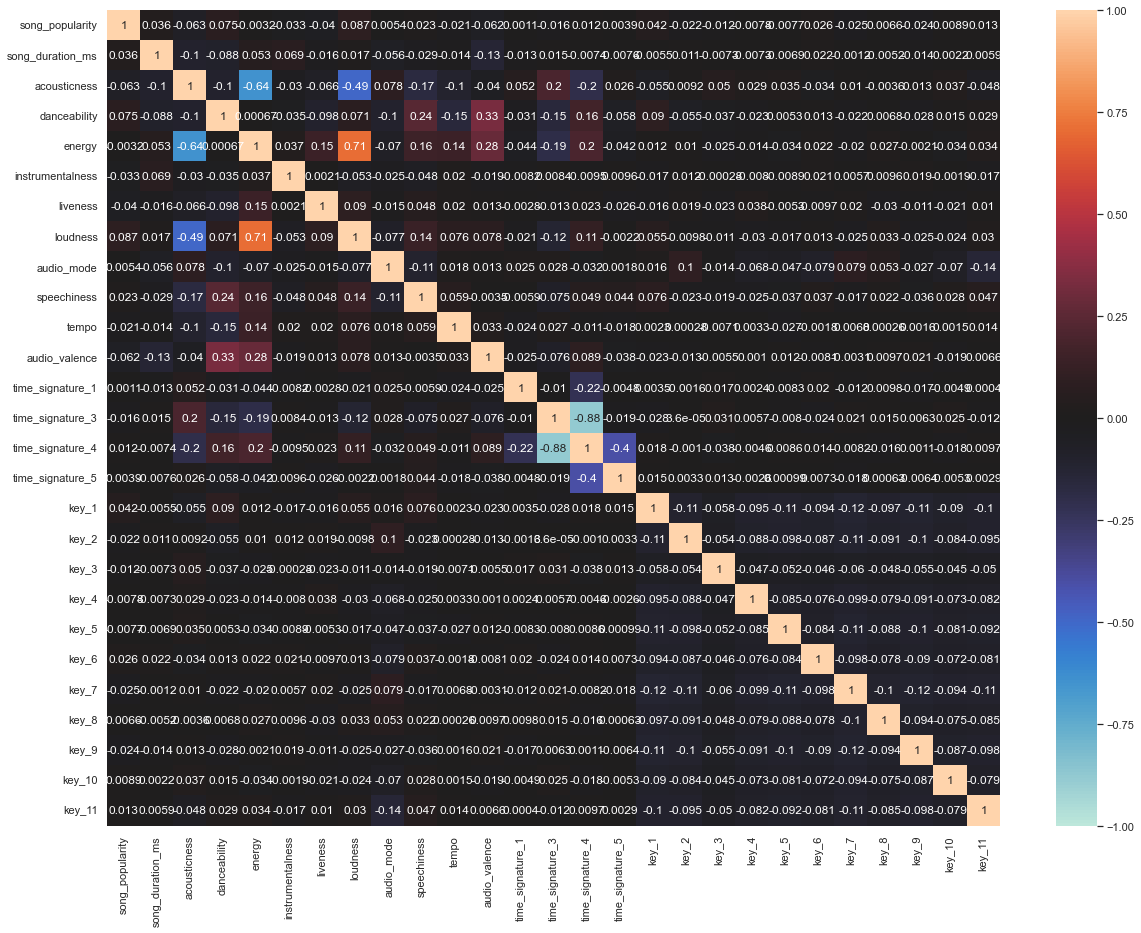

In [335]:
# FEATURE STRACTION
plt.figure(figsize=(20,15))
sns.heatmap(df_quantile.corr(), annot=True, vmin=-1, vmax=1, center=0)

In [329]:
# CORRELATION ANALISIS
# WE CAN SEE THAT EXISTS MULTICOLINEARITY, THEN LETS USE SOME MATH TO REMOVE THE UNNECESSARY FEATURES.
# REF
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error

import numpy as np

In [340]:

train_results = []
test_results = []
models = dict()

m=df_quantile.shape[1]-2
for val in range(m):
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=X_Train_scale.shape[1]-val)
    rfe.fit(X_Train_scale, Y_Train)
    
    model = LinearRegression()
    
    model.fit(X_Train_scale.loc[:, rfe.support_], Y_Train)
    
    Tr_pred = model.predict(X_Train_scale.loc[:,rfe.support_])
    Te_pred = model.predict(X_Test_scale.loc[:, rfe.support_])
    
    train_results.append(np.sqrt(mean_squared_error(Tr_pred, Y_Train)))
    test_results.append(np.sqrt(mean_squared_error(Te_pred, Y_Test)))    
    
    

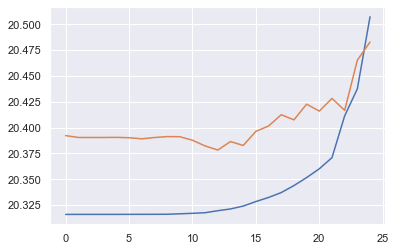

In [341]:
plt.plot(train_results)
plt.plot(test_results)